In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings(action="ignore")

In [12]:
import math

data = [26,31,28,38,41,26,18,16,25,29,
       39,38,38,40,43,38,39,41,41,40,
       26,19,39,28,43,34,21,41,29,30,
       12,22,45,34,29,26,29,58,42,16,
       41,42,38,42,28,42,39,41,39,43]

# 도수분포표 만드는 순서
# 1.k(계급 수)
k = 5
# 2.R(max - min)
R = max(data) - min(data)
# 3.계급간격
w = math.ceil(R/k)
# 4.시작계급값
s = min(data) - 0.5
print(f'계급수k: {k}, R: {R}, 계급간격w: {w}, 시작계급값s: {s}')

# 전체 계급구간
bins = np.arange(s, max(data)+w, step=w)
print(f'계급간격bins: {bins}')

# 계급구간
index = [f'{bins[i]}~{bins[i+1]}' for i in range(len(bins)) if i<len(bins)-1]
# index = []
# for i in range(len(bins)) :
#     if i < len(bins)-1:
#         index.append(f'{bins[i]}~{bins[i+1]}')
print(f'계급구간index: {index}')

# 도수
hist, bins = np.histogram(data, bins)
print(f'도수: {hist}')

# DataFrame으로 나타내기
df = pd.DataFrame(hist, index=index, columns=['도수'])
df.index.name = '계급간격'

# 상대도수
df['상대도수'] = [ x/sum(hist) for x in hist]

# 누적도수
df['누적도수'] = [sum(hist[:i+1]) if i>0 else hist[i] for i in range(k)]
# tmp = []
# for i in range(k):
#     if i > 0: 
#         tmp.append(sum(hist[:i+1]))
#     else: 
#         tmp.append(hist[i])
# df['누적도수'] = tmp   

# 누적상대도수
tmp = df['누적도수'].values
df['누적상대도수'] = [sum(tmp[:i+1]) if i>0 else tmp[i] for i in range(k)]

df['계급값'] = [ int((bins[i]+bins[i+1])/2) for i in range(k)]
df

계급수k: 5, R: 46, 계급간격w: 10, 시작계급값s: 11.5
계급간격bins: [11.5 21.5 31.5 41.5 51.5 61.5]
계급구간index: ['11.5~21.5', '21.5~31.5', '31.5~41.5', '41.5~51.5', '51.5~61.5']
도수: [ 6 15 20  8  1]


,도수,상대도수,누적도수,누적상대도수,계급값
계급간격,,,,,
11.5~21.5,6,0.12,6,6,16
21.5~31.5,15,0.30,21,27,26
31.5~41.5,20,0.40,41,68,36
41.5~51.5,8,0.16,49,117,46
51.5~61.5,1,0.02,50,167,56


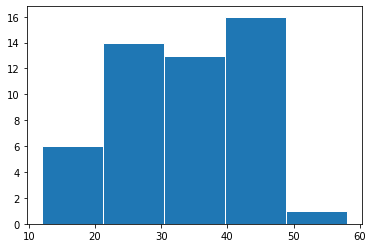

In [13]:
plt.hist(data,bins=5,edgecolor="w")
plt.show()

In [14]:
# 도수다각형 그리기

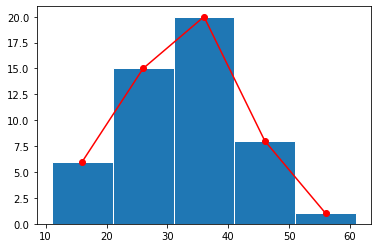

In [25]:
x = df.계급값.values
x = df.계급값
y = df.도수

plt.bar(x,y, edgecolor = "w", width = 10)
plt.plot(x,y,"ro-")
plt.show()

In [26]:
# 변동계수

In [32]:
A = [171,164,167,156,159,164]
B = [12.5,11.5,12.4,12.2]

print(f'A의 변동계수 : {np.std(A)/np.mean(A)*100}')
print(f'B의 변동계수 : {np.std(B)/np.mean(B)*100}')

A의 변동계수 : 3.011883119815322
B의 변동계수 : 3.214094516834015


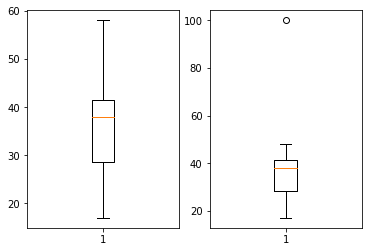

In [38]:
# 상자그림
grid = plt.GridSpec(1,2)
data = [26,31,27,38,42,26,18,17,25,26,26,26,26,27,28,28,29,29,29,30,
       30,31,34,34,38,38,38,38,38,39,39,39,39,39,40,40,41,41,41,42,42
       ,42,43,43,44,44,45,46,46,48,58]
plt.subplot(grid[0,0]).boxplot(data)


data2 = data = [26,31,27,38,42,26,18,17,25,26,26,26,26,27,28,28,29,29,29,30,
       30,31,34,34,38,38,38,38,38,39,39,39,39,39,40,40,41,41,41,42,42
       ,42,43,43,44,44,45,46,46,48,100]

plt.subplot(grid[0,1]).boxplot(data2)
plt.show()

In [ ]:
# 복원
a = np.random.ch(1,5,replace =True)


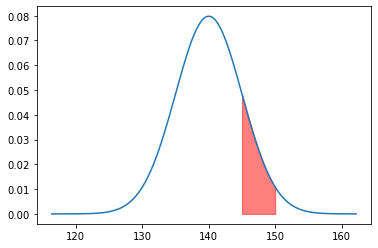

In [47]:
# 1.
s, mean, std = 100000,140,5
data = np.random.randn(s) * std + mean

# 2. 
prob= len([i for i in data if i >= 145 and i < 150]) / s

# 3.
from scipy.stats import norm
data.sort()
y = norm.pdf(data,mean,std) # 확률밀도함수에 대한 표준정규분포
plt.plot(data,y)
plt.fill_between(data,y,where= (data >= 145) & (data < 150), color = "red", alpha = 0.5)
plt.show()




ERROR! Session/line number was not unique in database. History logging moved to new session 617


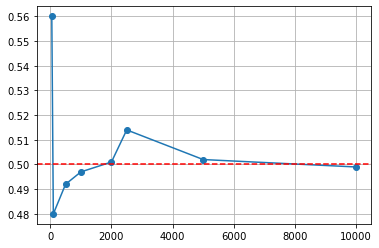

In [50]:
import random
import math

ns = [50,100,500,1000,2000,2500,5000,10000] # 시행횟수
rs = []   # 앞면의 수
ps = []   # 앞면의 상대도수

for n in ns:
    tmp= []
    for i in range(n):
        tmp.append( random.choice(['H','T']) )
    r = tmp.count('H')
    rs.append(round(r))
    ps.append(round(r/n,3))


# pandas 테이블 형태로 보여주기    
import pandas as pd
dics = dict()
for idx, n in enumerate(ns):
    key = ns[idx]
    values = [rs[idx], ps[idx]]
    dics[key] = values

df = pd.DataFrame(dics, columns=ns, index=['앞면의수','앞면의상대도수'])
df


# 그래프로 나타내기 
import matplotlib.pyplot as plt
    
x = ns
y = ps

plt.plot(x, y, 'o', linestyle='solid' )
plt.axhline(0.5, c='r', ls='--')
plt.grid()
plt.show()

## 확률분포

In [54]:
# 평균=기대값 함수
def E(X):
    x_set, f = X
    return np.sum([x_k * f(x_k) for x_k in x_set])

# 분산 함수
def V(X):
    x_set, f = X
    mean = E(X)
    return np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

# 확률 함수
def check_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set])  
    
    print(f'기대값 E(X): {E(X):.4}')
    print(f'분산   V(X): {V(X):.4}')
        
    
# 확률 그래프
def plot_prob(X):
    x_set, f = X
    prob = np.array([ f(x_k) for x_k in x_set]) 
    
    fig = plt.figure(figsize=(10,6))
    ax  = fig.add_subplot(111) # (1,1,1)
    
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', colors='red') #기대값:평균
    ax.set_xticks(np.append(x_set, E(X)))  #x축의 값 출력
    ax.set_ylim(0, prob.max()*1.2)         #y축의 한계 지정
    ax.legend()
    
    plt.show()  

#### 베르누이 분포

(array([0, 1]), <function Bern.<locals>.f at 0x000001E338D070D0>)


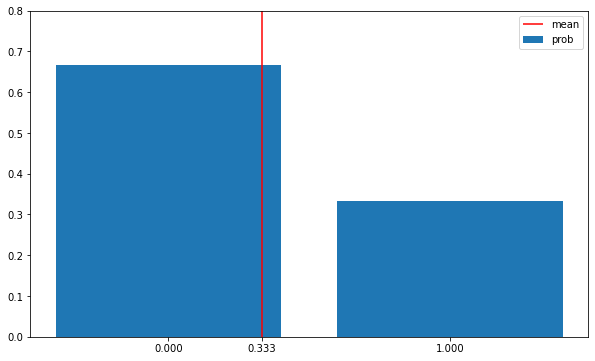

In [53]:
#베르누이분포
def Bern(p):
    x_set = np.array([0,1])
    
    def f(x):
        if x in x_set:
            return p**x * (1-p)**(1-x)
        else:
            return 0
        
    return x_set, f


p = 1/3
X = Bern(p)
print(X)

plot_prob(X)

#### 이항분포

기대값 E(X): 2.4
분산   V(X): 1.44


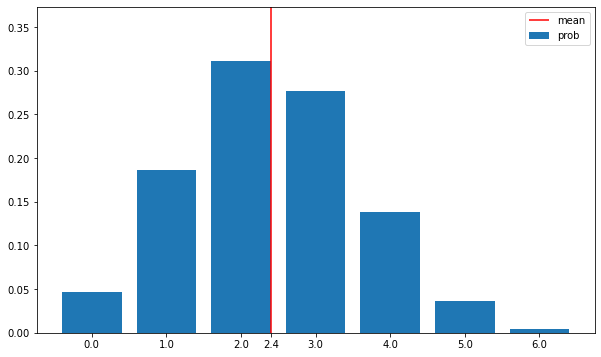

In [55]:
#scipy패키지의 special모듈에 있는 comb함수 사용
from scipy.special import comb

def Bin(n, p):
    x_set = np.arange(n+1)
    
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
        
    return x_set, f

n = 6   # n의 개수를 크게 해보기 --> 그래프가 종모양으로 변경됨
p = 0.4   # 0.3, 0.5, 0.7 변경해보기
X = Bin(n,p)
X

# 기대값과 분산
check_prob(X)

# 그래프
plot_prob(X)

## 연속확률분포

#### 정규분포

In [59]:
#𝑍 ~ N(0,1) 정규화를 따른 정규분포
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f


#X ~ N(2, 0.5^2 )
mu, sigma = 2, 0.5
X = N(mu, sigma)


기대값 E(X): nan
분산   V(X): nan


OverflowError: cannot convert float infinity to integer

<Figure size 720x432 with 1 Axes>